In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [ ]:
file = "csv/melb_data.csv"

df = pd.read_csv(file)
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [19]:
columns = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']
X = df[columns]
y = df.Price

In [20]:
print(X.head())
for col in columns:
    print(f"Max {col} - {X[col].max()}")
    X[col] = X[col] / X[col].max()
    
print(X.head())

   Rooms  Bathroom  Landsize  Lattitude  Longtitude
0      2       1.0     202.0   -37.7996    144.9984
1      2       1.0     156.0   -37.8079    144.9934
2      3       2.0     134.0   -37.8093    144.9944
3      3       2.0      94.0   -37.7969    144.9969
4      4       1.0     120.0   -37.8072    144.9941
Max Rooms - 10
Max Bathroom - 8.0
Max Landsize - 433014.0
Max Lattitude - -37.40853
Max Longtitude - 145.52635
   Rooms  Bathroom  Landsize  Lattitude  Longtitude
0    0.2     0.125  0.000466   1.010454    0.996372
1    0.2     0.125  0.000360   1.010676    0.996338
2    0.3     0.250  0.000309   1.010713    0.996345
3    0.3     0.250  0.000217   1.010382    0.996362
4    0.4     0.125  0.000277   1.010657    0.996343


/tmp/ipykernel_83140/1787505876.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col] / X[col].max()


In [21]:
print(y.max())
y = y / 1e8
print(y.max())

9000000.0
0.09


In [22]:
X_train, X_data, y_train, y_data = train_test_split(X, y)

adding: model.add(tf.keras.layers.Dense(10, activation='tanh'))
adding: model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
Pérdida final: 0.0000
Accuracy final: 0.0000


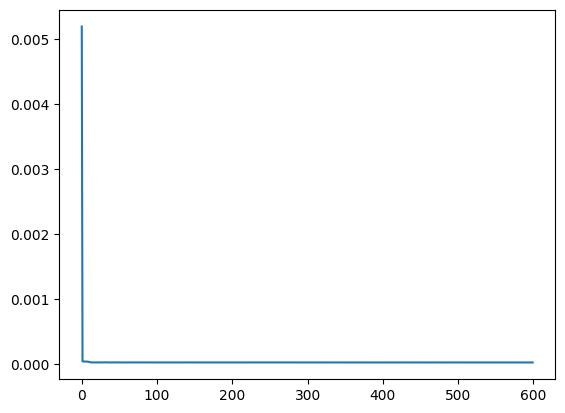

In [ ]:
pasos = 100
batch = 32
capas = (
    (10, 'tanh'),
    (1, 'sigmoid'),
)

model = tf.keras.Sequential(name="idp")
model.add(tf.keras.layers.InputLayer(shape=(5,)))
for capa in capas:
    print(f"adding: model.add(tf.keras.layers.Dense({capa[0]}, activation='{capa[1]}'))")
    exec(f"model.add(tf.keras.layers.Dense({capa[0]}, activation='{capa[1]}'))")


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

# model.summary()
history = model.fit(X, y, epochs=pasos, batch_size=batch, verbose=0)
print(f"Pérdida final: {history.history['loss'][-1]:.4f}")
print(f"Accuracy final: {history.history['accuracy'][-1]:.4f}")
lost_hist = history.history["loss"]
sns.lineplot(lost_hist)
plt.show()


In [25]:
y_predict = model.predict(X_data)
y_predict

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.00683369],
       [0.00684918],
       [0.00945012],
       ...,
       [0.01271367],
       [0.01051161],
       [0.01273318]], dtype=float32)

In [26]:
mean_absolute_error(y_data, y_predict)

0.003659904298322956